#Exercise 2: Logistic Regression

In [1]:
import pandas
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Part 1: Plotting 
  We start the exercise by first plotting the data to understand the 
  the problem we are working with.


In [2]:
data1 = pandas.read_csv("ex2data1.txt", header=None, names=['test1', 'test2', 'accepted'])
data1.head()

,test1,test2,accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Plotting data with + indicating (y = 1) examples and o 
 indicating (y = 0) examples.

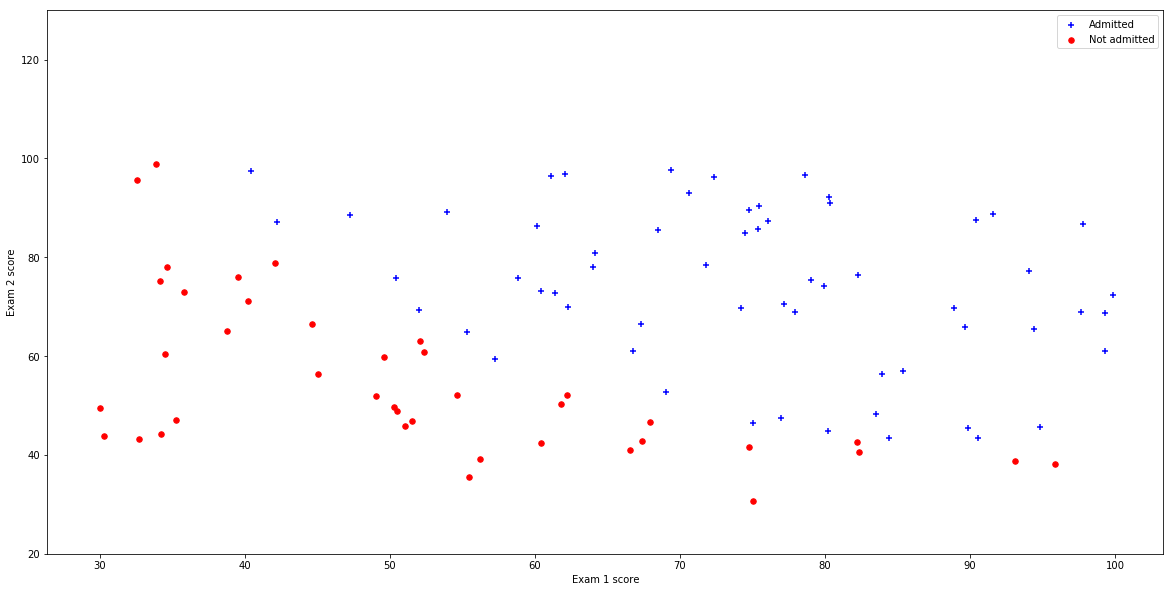

In [3]:
def plotData(data):
    fig, ax = plt.subplots(figsize=(20,10))
    results_accepted = data[data.accepted == 1]
    results_rejected = data[data.accepted == 0]
    ax.scatter(results_accepted.test1, results_accepted.test2, marker='+', c='b', s=40)
    ax.scatter(results_rejected.test1, results_rejected.test2, marker='o', c='r', s=30)
    return ax

ax = plotData(data1)
ax.set_ylim([20, 130])
ax.legend(['Admitted', 'Not admitted'], loc='best')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

In [4]:
X = data1[['test1', 'test2']].values
y = data1.accepted.values
m, n = X.shape
X = np.insert(X, 0, np.ones(len(X)), 1)
m, n

(100, 2)

## Part 2: Compute Cost and Gradient 
  In this part of the exercise, you will implement the cost and gradient
  for logistic regression. You neeed to complete the code in 
  the function `cost`.<br><br>
  Before you start with the actual cost function, recall that the logistic regres- sion hypothesis is defined as:<br><br>
  <center>$h_\theta(x)=g(\theta^Tx)$</center><br><br>
  where function g is the sigmoid function. The sigmoid function is defined as:<br><br>
  <center>$g(z)=\frac{1}{1+e^{-z}}$
  

In [5]:
def sigmoid(z):
    #SIGMOID Compute sigmoid functoon
    #   J = SIGMOID(z) computes the sigmoid of z.
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the sigmoid of each value of z (z can be a matrix,
    #               vector or scalar).
    
    g = 1.0 / (1.0 + (np.exp(-z)))
    
    # =============================================================
    
    return g

Now you will implement the cost function and gradient for logistic regression. Complete the code in costFunction.m to return the cost and gradient.<br><br>
Recall that the cost function in logistic regression is<br><br>
<center>$J(\theta)=\frac{1}{m}\sum\limits_{i=1}^m \:[-y^{(i)}\log(h_\theta(x^{(i)})-(1-y^{(i)})\log(1-h_\theta(x^{(i)})]$</center><br><br>

and the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0,1,...,n) is defined as follows:<br><br>

<center>$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum\limits_{i=1}^m \:({h}_\theta({x}^{(i)})-{y}^{(i)})x_j^{(i)}$</center><br><br>
Note that while this gradient looks identical to the linear regression gra- dient, the formula is actually different because linear and logistic regression have different definitions of hθ(x).<br><br>

In [6]:
def cost(X, y, th, _lambda=0):
    #COSTFUNCTION Compute cost and gradient for logistic regression
    #   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    #   parameter for logistic regression and the gradient of the cost
    #   w.r.t. to the parameters.

    # Initialize some useful values
    m = len(y)
    
    # You need to return the following variables correctly
    J = 0
    
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    #

    h = sigmoid(np.dot(X,th))
    
    J = np.dot(np.transpose(-y),np.log(h)) - np.dot(np.transpose(1-y),np.log(1-h))
    J = J/m

    # =============================================================
    
    return J

In [7]:
def gradient(X, y, th, _lambda=0):
    # Initialize some useful values
    m = len(y)
    
    # You need to return the following variables correctly
    grad = np.zeros(th.shape)
    
    # ====================== YOUR CODE HERE ======================
    h = sigmoid(np.dot(X,th))
    grad = (1.0/m)*(np.transpose(np.dot(np.transpose(h-y),X)))
    
    # =============================================================
    
    return grad

In [8]:
initial_theta = np.zeros(n + 1)
initial_theta.shape

(3,)

The cost at initial theta (zeros) should be about `0.693`.

In [9]:
cost(X, y, np.array(initial_theta))

0.69314718055994518

The gradient at initial theta should be `[-0.1, -12.01, -11.26]`.

In [10]:
gradient(X, y, np.array([0,0,0]))

array([ -0.1       , -12.00921659, -11.26284221])

## Part 3: Optimizing using fminunc
  In this exercise, you will use a built-in function (scipy.optimize.fmin_ncg) to find the
  optimal parameters theta.


In [11]:
def mycost(t):
    return cost(X, y, t)

def mygrad(t):
    return gradient(X, y, t)

import timeit
start = timeit.default_timer()


optimal_theta = scipy.optimize.fmin_ncg(mycost,
                                        initial_theta,
                                        fprime=mygrad)


stop = timeit.default_timer()
print(stop - start)


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 28
         Function evaluations: 71
         Gradient evaluations: 246
         Hessian evaluations: 0
0.016948925120355025


Value of theta that minimizes the cost function:

In [12]:
optimal_theta

array([-25.15251954,   0.20616121,   0.20140028])

We plot the decision boundary.

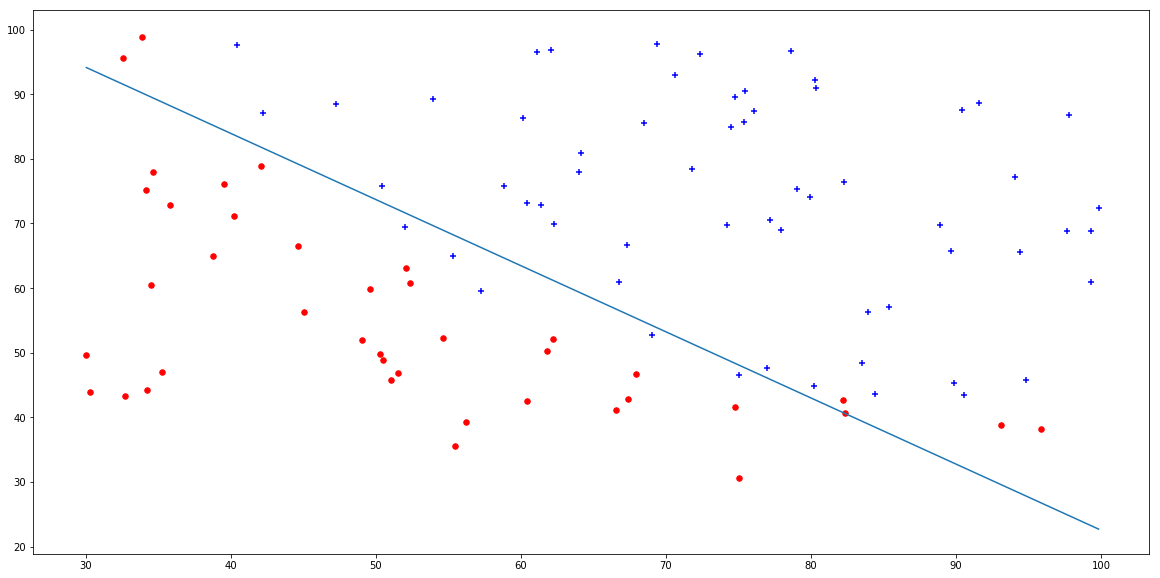

In [13]:

ax = plotData(data1)
x_plot = np.array([np.max(X[:, 1]), np.min(X[:,1])])
y_plot = (-optimal_theta[0] - optimal_theta[1]*x_plot) / (optimal_theta[2])
ax.plot(x_plot, y_plot)


## Part 4: Predict and Accuracies 
  After learning the parameters, you'll like to use it to predict the outcomes
  on unseen data. In this part, you will use the logistic regression model
  to predict the probability that a student with score 45 on exam 1 and 
  score 85 on exam 2 will be admitted.

  Furthermore, you will compute the training and test set accuracies of 
  our model.

  Your task is to complete the code in `predict`.


In [14]:
def predict(t, x):
    #PREDICT Predict whether the label is 0 or 1 using learned logistic 
    #regression parameters theta
    #   p = PREDICT(theta, X) computes the predictions for X using a 
    #   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    
    m = X.shape[0] # Number of training examples
    
    # You need to return the following variables correctly
    p = np.zeros(m)
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the following code to make predictions using
    #               your learned logistic regression parameters. 
    #               You should set p to a vector of 0's and 1's
    #

    thetaX = np.dot(np.transpose(t),np.transpose(X))
    h = sigmoid(thetaX)
    
    for i in range(m):
        if h[i]>=0.5:
            p[i] = 1
        else:
            p[i] = 0
    
    
    # =========================================================================
    
    return p

Let's predict the admission probably of a student with scores 45 and 85:

Training set accuracy:

In [17]:
print ('logistic regression, training accuracy : ' + str(np.mean(predict(optimal_theta, X) == y)))

logistic regression, training accuracy : 0.89


# K-Nearest Neighbors


<p>KNN is a form of <i>instance</i>, or <i>memory</i> based learning wherein we don't learn a function $f(X)$ to estimate $E[Y|X]$. Rather, to make a classification for a given instance $X_i$, we search the training data for the $k$ nearest neighbors, as defined by some distance metric $d(X_i,X_j)$. The estimate of $E[Y|X]$ is then given by:<br><br>

<center>$E[Y|X] = \sum\limits_{y_i \in N(X)}^k Y_i$</center><br><br>

The most common distance function used in kNN is the <i>Euclidean Distance</i>.<br><br>

Let $X = <x^1,...x^p>$ be a $p$-dimensional vector, then for two instances $i$ and $j$:<br><br>
<center>$eud(X_i,X_j) = \sqrt{(x_i^1-x_j^1)^2+...+(x_i^p-x_j^p)^2} = \sqrt{\sum\limits_{t=1}^p (x_i^t-x_j^t)^2}$
</center>
<br><br>

See here for implementation details, 
(https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
</p>

In [18]:
import operator
def euclideanDistance(targetX, dataSet):
    
    distances = 0
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the code to obtain euclideanDistance between one targetX and the other.
    #
    
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(targetX, (dataSetSize,1)) - dataSet ## target과 다른 data와 거리 계산
    sqDiffMat = diffMat**2 ## 각 항목 제곱
    sqDistances = sqDiffMat.sum(axis=1) ## 제곱의 결과를 합한다
    distances = sqDistances**0.5 ## 루트
    
    # =========================================================================
    
    return distances
    

def getKNN(targetX, dataSet, labels, k):
    ## targetX : target data
    ## dataset : other data
    ## labels
    ## k : number of neighbors
    
    # compute euclidean distance
    distances = euclideanDistance(targetX,dataSet)
    closest_data = 0
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Use the result of finding the distance between TargetX and other data,
    #               select the most out of k data closest to target data
    #

    ##거리 계산결과 정렬
    sortedDistIndices = distances.argsort()
    classCount = {}

    #Training data 중에서 target 데이터와 가장 가까운 k개의 데이터중 가장 많이 나온 분류항목 선택
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    closest_data = sortedClassCount[0][0]

    # =========================================================================
    
    return closest_data

def predictKNN(X, y, k):
    predicted_array = np.zeros((X.shape[0],))
    
    for i in range(X.shape[0]):
        predicted_array[i] = getKNN(X[i],X,y,k)
    
    return predicted_array

In [19]:
k=2
result_knn = predictKNN(X,y,k)

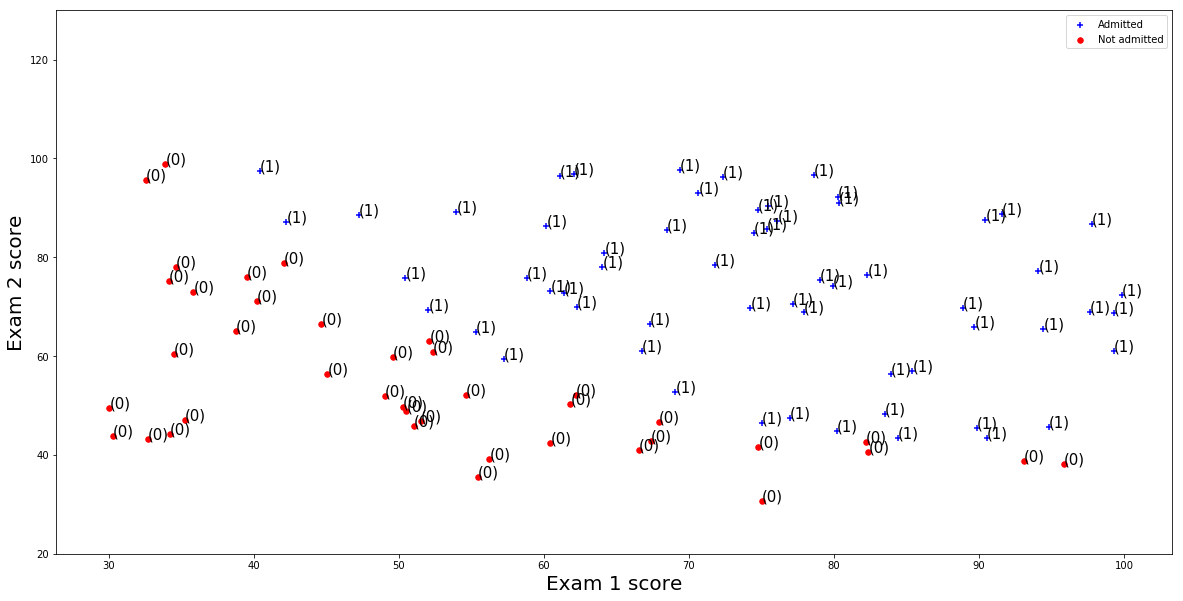

In [20]:
def plotData(data):
    fig, ax = plt.subplots(figsize=(20,10))
    results_accepted = data[data.accepted == 1]
    results_rejected = data[data.accepted == 0]
    ax.scatter(results_accepted.test1, results_accepted.test2, marker='+', c='b', s=40)
    ax.scatter(results_rejected.test1, results_rejected.test2, marker='o', c='r', s=30)
    return ax
ax = plotData(data1)
ax.set_ylim([20, 130])
i = 0
for xy in zip(X[:,1],X[:,2]):
    ax.annotate('(%s)' % int(result_knn[i]), xy=xy, textcoords='data',size=15)
    i += 1
ax.set_ylim([20, 130])
ax.legend(['Admitted', 'Not admitted'], loc='best')
ax.set_xlabel('Exam 1 score',fontsize=20)
ax.set_ylabel('Exam 2 score',fontsize=20)

In [44]:
print ('K-nearest neighbors, k = '+str(k)+', training accuracy : ' + str(np.mean(result_knn == y)))

K-nearest neighbors, k = 2, training accuracy : 0.491525423729


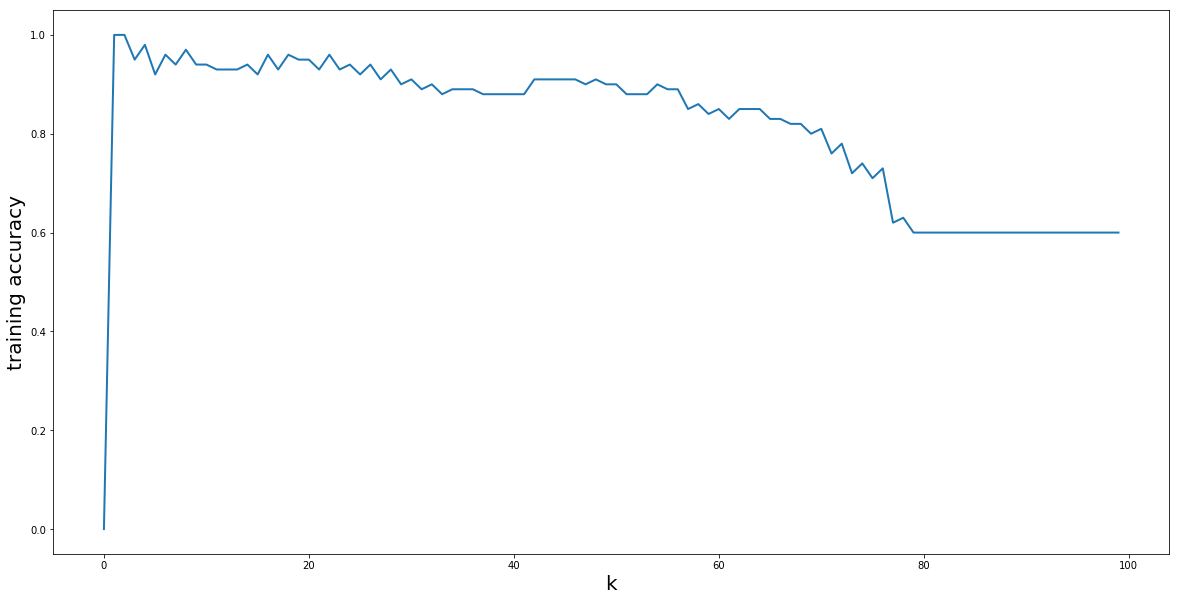

In [22]:
accuracy_from_dif_k = np.zeros((100,))

for dif_k in range(1,100):
    result_knn = predictKNN(X,y,dif_k)
    accuracy = np.mean(result_knn == y)
    accuracy_from_dif_k[dif_k] = accuracy
    
plt.figure(figsize=(20,10))
plt.plot(accuracy_from_dif_k, linewidth=2.0)
plt.ylabel('training accuracy',fontsize=20)
plt.xlabel('k',fontsize=20)
plt.show()

# Part 2: Regularized logistic regression

In this part, you are given a dataset with data points that are not
linearly separable. However, you would still like to use logistic 
regression to classify the data points. 

To do so, you introduce more features to use -- in particular, you add
polynomial features to our data matrix (similar to polynomial
regression).

You're expected to modify the cost and gradient functions you've already written so that they take the regularization constant into account and perform regularization.

In [23]:
data2 = pandas.read_csv("./ex2data2.txt", header=None, names=['test1', 'test2', 'accepted'])
data2.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


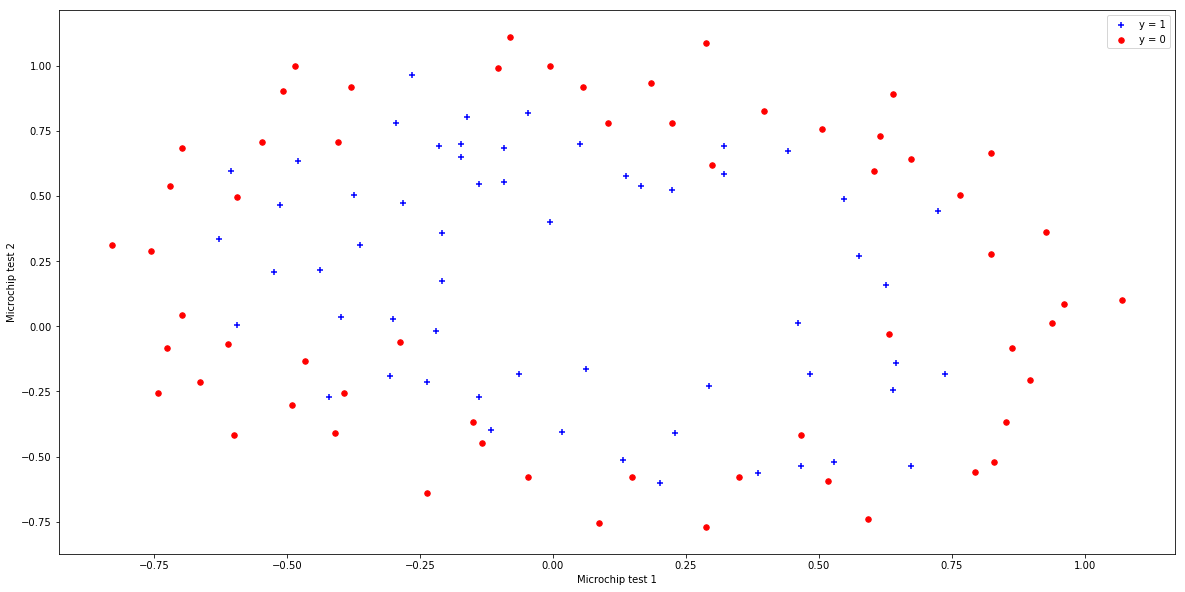

In [24]:
ax = plotData(data2)
ax.legend(['y = 1', 'y = 0'], loc='best')
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')

In [25]:
def mapFeature(x1, x2):
    ret = np.array([x1**(i-j) * x2**j 
                    for i in range(1,7) for j in range(i+1)
                   ])
    return np.insert(ret, 0, np.ones(len(x1)), 0).T

mapFeature(np.array([2,3]),np.array([3,2]))[:, :10]

array([[ 1,  2,  3,  4,  6,  9,  8, 12, 18, 27],
       [ 1,  3,  2,  9,  6,  4, 27, 18, 12,  8]])

 Note that mapFeature also adds a column of ones for us, so the intercept
 term is handled.

In [26]:
X = mapFeature(data2.test1, data2.test2)
y = data2.accepted.values
initial_theta = np.zeros(X.shape[1])
X.shape, y.shape, initial_theta.shape

((118, 28), (118,), (28,))

The cost at the initial theta is:

In [27]:
cost(X, y, initial_theta) 

0.69314718055994529

## Part 2: Regularization and Accuracies 
  Optional Exercise:
 In this part, you will get to try different values of lambda and 
  see how regularization affects the decision coundart

  Try the following values of lambda (0, 1, 10, 100).

  How does the decision boundary change when you vary lambda? How does
  the training set accuracy vary?



In [28]:
lambda_ = 0

In [29]:
optimal_theta = scipy.optimize.fmin_bfgs(lambda t: cost(X, y, t, lambda_),
                                        initial_theta,
                                        lambda t: gradient(X, y, t, lambda_))


Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547


At the optimal theta value, the accuracy is:

In [30]:
print 'Regularized logistic regression, training accuracy : ' +str(np.mean(predict(optimal_theta, X) == y))

SyntaxError: invalid syntax (<ipython-input-30-9121d219c9ce>, line 1)

In [31]:
optimal_theta

array([   35.10189876,    44.1191398 ,    69.27185754,  -344.27894626,
        -198.23457468,  -184.22835729,  -295.82029842,  -621.73257174,
        -510.84920997,  -328.31174393,  1094.7000248 ,  1269.58568069,
        1757.74861904,   900.93765339,   436.58874891,   471.12018238,
        1236.23851756,  1822.82005824,  1929.66717938,  1131.05284817,
         463.79915478, -1142.11709742, -2020.95896597, -3463.39923227,
       -3484.51005674, -3252.26677812, -1546.0089499 ,  -510.41257258])

The decision boundary:

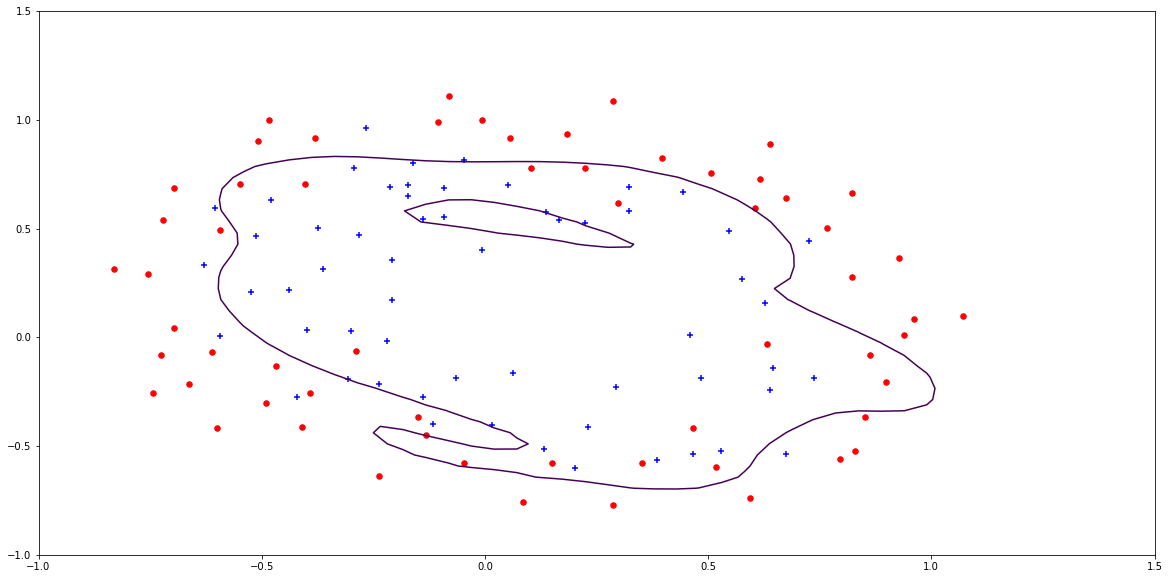

In [32]:
contour_x = np.linspace(-1, 1.5)
contour_y = np.linspace(-1, 1.5)
def calc_z(x, y):
    return mapFeature(np.array([x]), np.array([y])).dot(optimal_theta)

z = np.zeros((len(contour_x), len(contour_y)))
for i, c_x in enumerate(contour_x):
    for j, c_y in enumerate(contour_y):
        z[i,j] = calc_z(c_x, c_y)[0]
        
ax = plotData(data2)
ax.contour(contour_x, contour_y, z, levels=[0])

In [38]:
print (z)

[[ -16063.12801945  -13706.48423563  -11661.58651123 ...,   -1269.20416345
    -1484.58560351   -1738.22826651]
 [ -13565.95486369  -11489.45451193   -9697.04675307 ...,   -1056.98194573
    -1252.2452845    -1484.29632777]
 [ -11425.66776275   -9600.42830889   -8033.61938393 ...,    -882.73458613
    -1060.22362242   -1273.3418562 ]
 ..., 
 [  -3233.9600299    -3005.29279421   -2813.83463332 ...,  -62599.68163765
   -70376.30240987  -79021.17874003]
 [  -4009.85134248   -3762.87278088   -3556.55630219 ...,  -71678.56071582
   -80252.82958407  -89758.61341975]
 [  -4952.61773547   -4687.45563858   -4466.78564507 ...,  -81909.98567273
   -91349.79725606 -101787.97152598]]


In [39]:
contour_x = np.linspace(-1, 1.5)

In [40]:
print (contour_x)

[-1.         -0.94897959 -0.89795918 -0.84693878 -0.79591837 -0.74489796
 -0.69387755 -0.64285714 -0.59183673 -0.54081633 -0.48979592 -0.43877551
 -0.3877551  -0.33673469 -0.28571429 -0.23469388 -0.18367347 -0.13265306
 -0.08163265 -0.03061224  0.02040816  0.07142857  0.12244898  0.17346939
  0.2244898   0.2755102   0.32653061  0.37755102  0.42857143  0.47959184
  0.53061224  0.58163265  0.63265306  0.68367347  0.73469388  0.78571429
  0.83673469  0.8877551   0.93877551  0.98979592  1.04081633  1.09183673
  1.14285714  1.19387755  1.24489796  1.29591837  1.34693878  1.39795918
  1.44897959  1.5       ]


In [41]:
k=2
result_knn = predictKNN(X,y,k)
print ('K-nearest neighbors, k = '+str(k)+', training accuracy : ' + str(np.mean(result_knn == y)))

K-nearest neighbors, k = 2, training accuracy : 1.0


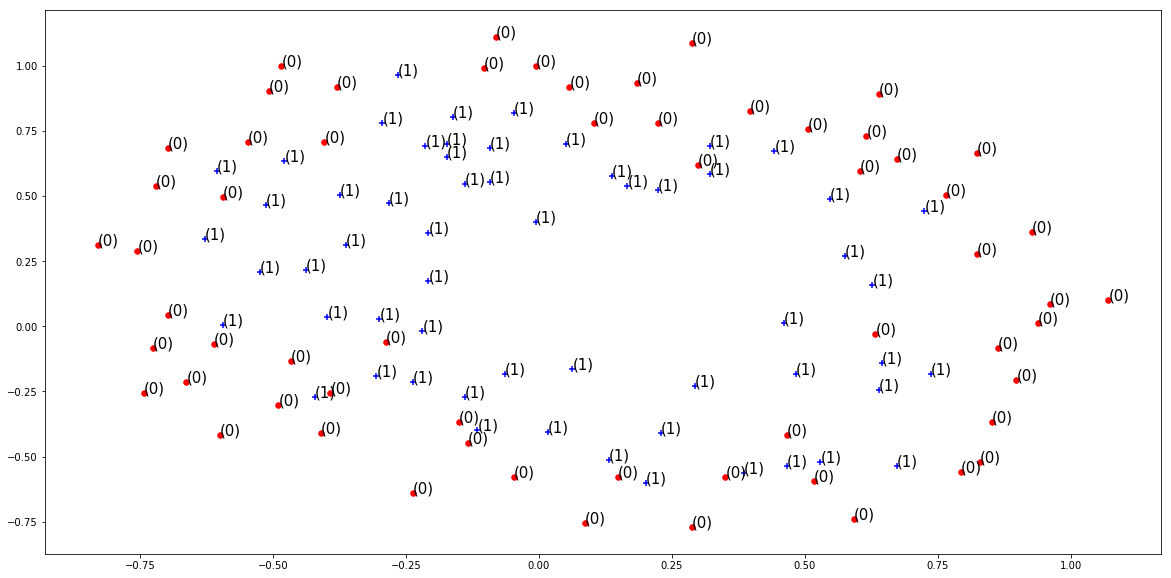

In [42]:
ax = plotData(data2)
i = 0
for xy in zip(X[:,1],X[:,2]):
    ax.annotate('(%s)' % int(result_knn[i]), xy=xy, textcoords='data',size=15)
    i += 1

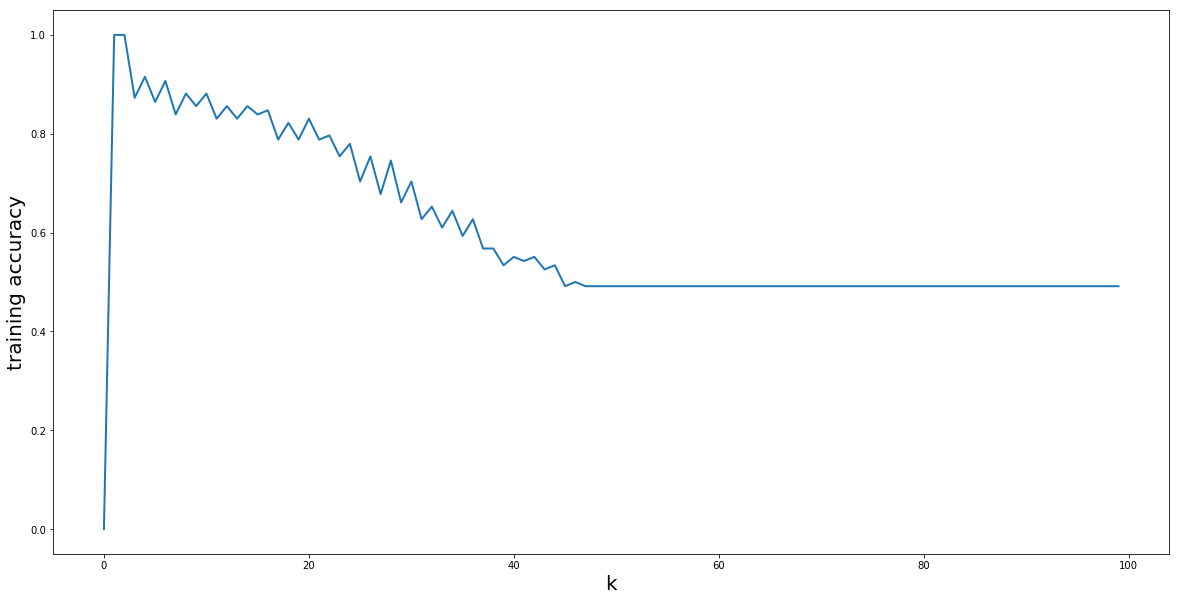

In [43]:
accuracy_from_dif_k = np.zeros((100,))

for dif_k in range(1,100):
    result_knn = predictKNN(X,y,dif_k)
    accuracy = np.mean(result_knn == y)
    accuracy_from_dif_k[dif_k] = accuracy
    
plt.figure(figsize=(20,10))
plt.plot(accuracy_from_dif_k, linewidth=2.0)
plt.ylabel('training accuracy',fontsize=20)
plt.xlabel('k',fontsize=20)
plt.show()